In [211]:
%matplotlib inline
import numpy as np
import pandas as pd
import datetime as dt
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
data = pd.read_csv ('C:/Users/garim/Documents/Projects/Data Mining Project/ted_main.csv')
#print (data.columns)
print (data['film_date'].head())
print (data['published_date'].head())
data['film_date'] =data['film_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
data['published_date'] = data['published_date'].apply(lambda x: dt.datetime.fromtimestamp( int(x)).strftime('%d-%m-%Y'))
print (data['film_date'].head())
print (data['published_date'].head())
data.head()

0    1140825600
1    1140825600
2    1140739200
3    1140912000
4    1140566400
Name: film_date, dtype: int64
0    1151367060
1    1151367060
2    1151367060
3    1151367060
4    1151440680
Name: published_date, dtype: int64
0    24-02-2006
1    24-02-2006
2    23-02-2006
3    25-02-2006
4    21-02-2006
Name: film_date, dtype: object
0    26-06-2006
1    26-06-2006
2    26-06-2006
3    26-06-2006
4    27-06-2006
Name: published_date, dtype: object


,comments,description,duration,event,film_date,languages,main_speaker,name,num_speaker,published_date,ratings,related_talks,speaker_occupation,tags,title,url,views
0,4553,Sir Ken Robinson makes an entertaining and pro...,1164,TED2006,24-02-2006,60,Ken Robinson,Ken Robinson: Do schools kill creativity?,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 19645}, {...","[{'id': 865, 'hero': 'https://pe.tedcdn.com/im...",Author/educator,"['children', 'creativity', 'culture', 'dance',...",Do schools kill creativity?,https://www.ted.com/talks/ken_robinson_says_sc...,47227110
1,265,With the same humor and humanity he exuded in ...,977,TED2006,24-02-2006,43,Al Gore,Al Gore: Averting the climate crisis,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 544}, {'i...","[{'id': 243, 'hero': 'https://pe.tedcdn.com/im...",Climate advocate,"['alternative energy', 'cars', 'climate change...",Averting the climate crisis,https://www.ted.com/talks/al_gore_on_averting_...,3200520
2,124,New York Times columnist David Pogue takes aim...,1286,TED2006,23-02-2006,26,David Pogue,David Pogue: Simplicity sells,1,26-06-2006,"[{'id': 7, 'name': 'Funny', 'count': 964}, {'i...","[{'id': 1725, 'hero': 'https://pe.tedcdn.com/i...",Technology columnist,"['computers', 'entertainment', 'interface desi...",Simplicity sells,https://www.ted.com/talks/david_pogue_says_sim...,1636292
3,200,"In an emotionally charged talk, MacArthur-winn...",1116,TED2006,25-02-2006,35,Majora Carter,Majora Carter: Greening the ghetto,1,26-06-2006,"[{'id': 3, 'name': 'Courageous', 'count': 760}...","[{'id': 1041, 'hero': 'https://pe.tedcdn.com/i...",Activist for environmental justice,"['MacArthur grant', 'activism', 'business', 'c...",Greening the ghetto,https://www.ted.com/talks/majora_carter_s_tale...,1697550
4,593,You've never seen data presented like this. Wi...,1190,TED2006,21-02-2006,48,Hans Rosling,Hans Rosling: The best stats you've ever seen,1,27-06-2006,"[{'id': 9, 'name': 'Ingenious', 'count': 3202}...","[{'id': 2056, 'hero': 'https://pe.tedcdn.com/i...",Global health expert; data visionary,"['Africa', 'Asia', 'Google', 'demo', 'economic...",The best stats you've ever seen,https://www.ted.com/talks/hans_rosling_shows_t...,12005869


In [212]:
import ast
data['ratings'] = data['ratings'].apply(lambda x: ast.literal_eval(x))

In [213]:
#Add Topic column in the dataset
talk_topic = ""
def topic_function(data_topic):
    data_topic = sorted(data_topic, key=lambda k: k['count'])
    return data_topic[0]['name']
data['Topics']= data['ratings'].apply(topic_function)

In [214]:
pos_or_neg = ""
def pos_neg_function(rating):
    i=rating
    if (i=='Beautiful' or i=='Courageous' or i=='Funny' or i=='Informative' or i=='Ingenious' or i=='Inspiring' or i=='Jaw-dropping' or i=='Persuasive' ):
        pos_or_neg=1
    elif (i=='OK'):
        pos_or_neg=0
    else :
        pos_or_neg=-1
    return pos_or_neg
data["sentiment"] = data['Topics'].apply(pos_neg_function)

In [215]:
#Calculating quartile ranges and means
data = data.sort_values('views')
mid = int(len(data)/2)
k=list(data['views'])
lowerQ = np.median(sorted(k[:mid]))
median = np.median(sorted(k))
upperQ = np.median(sorted(k[mid:]))
iq_range = upperQ-lowerQ
print(lowerQ)
print(median)
print(upperQ)
print(iq_range)

755399.0
1124523.5
1701743.0
946344.0


In [216]:
print(max(data['views']))
def is_outlier(data):
    if data > (median + (1.5* iq_range)) or data < (median - (1.5* iq_range)):
        return True
    else:
        return False
#apply the function to the original df:
data.loc[:, 'outlier'] = data['views'].apply(is_outlier)
#filter to only non-outliers:
data = data[~(data.outlier)]
data.head()
len(data)
print(max(data['views']))

47227110
2543750


In [217]:
data = data.sort_values('views')
mid = int(len(data)/2)
k=list(data['views'])
lowerQ = np.median(sorted(k[:mid]))
mean = np.mean(sorted(k))
upperQ = np.median(sorted(k[mid:]))
iq_range = upperQ-lowerQ
print(lowerQ)
print(mean)
print(upperQ)
print(iq_range)

707788.0
1099370.98648
1428575.0
720787.0


In [218]:
def views_function(data_views):
    if(data_views<=mean):
            return(-1)
    else:
            return(1)
data["views_based"] = data['views'].apply(views_function)
print (data["views_based"].value_counts())
data.columns[data.isnull().any()]

-1    1232
 1     987
Name: views_based, dtype: int64


Index(['speaker_occupation'], dtype='object')

In [219]:
#print(max(data['comments']))
#print(max(data['duration']))
#data['comments']= (data['comments'] - data['comments'].mean()) / (data['comments'].max() - data['comments'].min())
#data['comments'] = data['comments'].apply(lambda x : float(x)/len(data['comments']))
#data['duration']= (data['duration'] - data['duration'].mean()) / (data['duration'].max() - data['duration'].min())
#data["views"]=(data['views'] - data['views'].mean()) / (data['views'].max() - data['views'].min())
#data["languages"]=(data['languages'] - data['languages'].mean()) / (data['languages'].max() - data['languages'].min())
#data['duration'] =  data['duration'].apply(lambda x : float(x)/len(data['duration']))
#print(max(data['comments']))
#print(max(data['duration']))
#data['views_based'].corr(data['comments'])

In [220]:
data.to_csv('ted_main_1.csv', sep=',',encoding='utf-8')

In [221]:
#classification for views_based
from sklearn.model_selection import train_test_split
predictors = data.drop(['views_based','views','outlier','Topics','published_date','film_date','description','event','main_speaker','name','ratings','related_talks','speaker_occupation','tags','title','url'], axis=1)
target = data["views_based"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 1)
predictors.corr()

,comments,duration,languages,num_speaker,sentiment
comments,1.000000,0.104326,0.235007,-0.037601,0.062477
duration,0.104326,1.000000,-0.332363,0.021472,0.022377
languages,0.235007,-0.332363,1.000000,-0.061661,-0.009331
num_speaker,-0.037601,0.021472,-0.061661,1.000000,0.058196
sentiment,0.062477,0.022377,-0.009331,0.058196,1.000000


In [222]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

64.62
Confusion matrix
[[153 132]
 [ 41 163]]
Precision : 0.552542372881
Recall : 0.799019607843
F measure : 0.653306613226


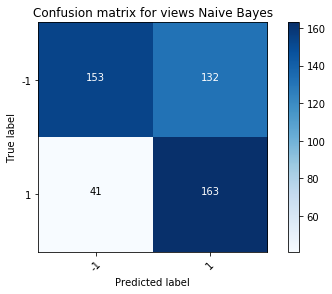

In [223]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import average_precision_score
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)
cnf_matrix=confusion_matrix(y_val,y_pred)
plot_confusion_matrix(cnf_matrix,classes=['-1','1'],
                      title='Confusion matrix for views Naive Bayes')
plt.figure()
#y_val = label_binarize(y_val, classes=[-1,1])
precision = precision_score(y_val,y_pred)
recall=recall_score(y_val,y_pred)
fscore = f1_score(y_val,y_pred)
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))

58.08
Confusion matrix
[[280   5]
 [200   4]]
Precision : 0.444444444444
Recall : 0.0196078431373
F measure : 0.037558685446


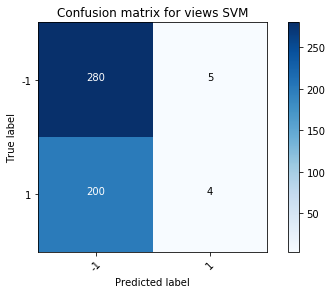

In [224]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)
cnf_matrix=confusion_matrix(y_val,y_pred)
plot_confusion_matrix(cnf_matrix,classes=['-1','1'],
                      title='Confusion matrix for views SVM')
precision = precision_score(y_val,y_pred)
recall=recall_score(y_val,y_pred)
fscore = f1_score(y_val,y_pred)
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))
plt.figure()

66.26
Confusion matrix
[[206  79]
 [ 86 118]]
Precision : 0.598984771574
Recall : 0.578431372549
F measure : 0.588528678304


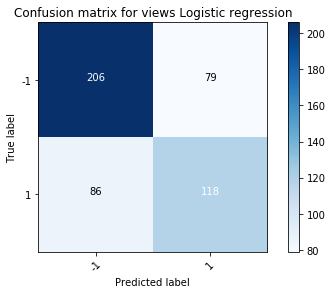

In [225]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)
cnf_matrix=confusion_matrix(y_val,y_pred)
plot_confusion_matrix(cnf_matrix,classes=['-1','1'],
                      title='Confusion matrix for views Logistic regression')
precision = precision_score(y_val,y_pred)
recall=recall_score(y_val,y_pred)
fscore = f1_score(y_val,y_pred)
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))
plt.figure()

56.85
Confusion matrix
[[166 119]
 [ 92 112]]
Precision : 0.484848484848
Recall : 0.549019607843
F measure : 0.514942528736


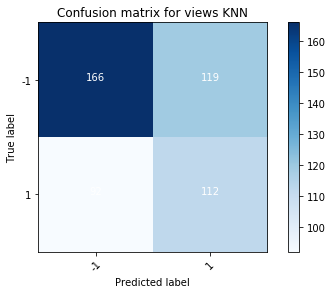

In [226]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)
cnf_matrix=confusion_matrix(y_val,y_pred)
plot_confusion_matrix(cnf_matrix,classes=['-1','1'],
                      title='Confusion matrix for views KNN')
precision = precision_score(y_val,y_pred)
recall=recall_score(y_val,y_pred)
fscore = f1_score(y_val,y_pred)
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))
plt.figure()

In [227]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

62.37


In [228]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',  'Naive Bayes'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Logistic Regression,66.26
3,Naive Bayes,64.62
0,Support Vector Machines,58.08
1,KNN,56.85


In [229]:
#classification for comments
from sklearn.model_selection import train_test_split
predictors = data.drop(['sentiment','Topics','published_date','outlier','film_date','description','event','main_speaker','name','ratings','related_talks','speaker_occupation','tags','title','url'], axis=1)
target = data["sentiment"]

x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 1)

57.87
Confusion matrix
[[260   2  16]
 [  1   0   0]
 [187   0  23]]
Precision : 0.583201307895
Recall : 0.578732106339
F measure : 0.486530957103


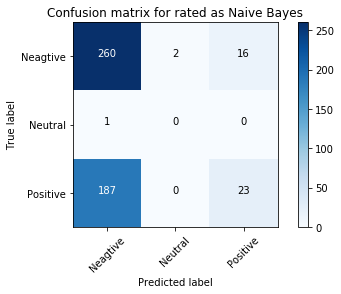

In [230]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)
cnf_matrix=confusion_matrix(y_val,y_pred)
plot_confusion_matrix(cnf_matrix,classes=["Neagtive","Neutral","Positive"],
                      title='Confusion matrix for rated as Naive Bayes')
#y_val = label_binarize(y_val, classes=[-1,0,1])
precision = precision_score(y_val,y_pred,average='weighted')
recall=recall_score(y_val,y_pred,average='weighted')
fscore = f1_score(y_val,y_pred,average='weighted')
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))
plt.figure()

56.85
[[278   0   0]
 [  1   0   0]
 [210   0   0]]
Confusion matrix
[[278   0   0]
 [  1   0   0]
 [210   0   0]]
Precision : 0.323200388088
Recall : 0.568507157464
F measure : 0.412112098501


C:\Users\garim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\garim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


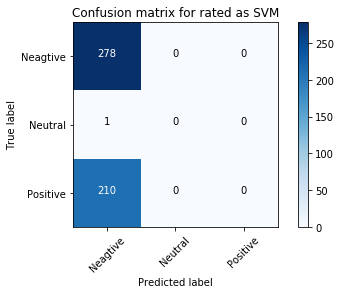

In [231]:
# Support Vector Machines
from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)
cnf_matrix=confusion_matrix(y_val,y_pred)
print(cnf_matrix)
plot_confusion_matrix(cnf_matrix,classes=["Neagtive","Neutral","Positive"],
                      title='Confusion matrix for rated as SVM')
precision = precision_score(y_val,y_pred,average='weighted')
recall=recall_score(y_val,y_pred,average='weighted')
fscore = f1_score(y_val,y_pred,average='weighted')
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))
plt.figure()

56.24
Confusion matrix
[[268   0  10]
 [  1   0   0]
 [203   0   7]]
Precision : 0.499627905649
Recall : 0.562372188139
F measure : 0.432778885856


C:\Users\garim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\garim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


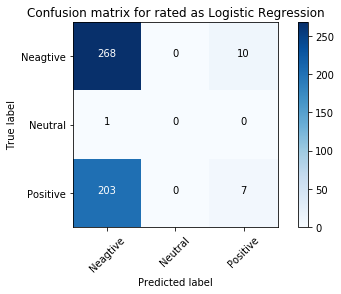

In [232]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)
cnf_matrix=confusion_matrix(y_val,y_pred)
plot_confusion_matrix(cnf_matrix,classes=["Neagtive","Neutral","Positive"],
                      title='Confusion matrix for rated as Logistic Regression')
precision = precision_score(y_val,y_pred,average='weighted')
recall=recall_score(y_val,y_pred,average='weighted')
fscore = f1_score(y_val,y_pred,average='weighted')
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))
plt.figure()

55.62
Confusion matrix
[[203   0  75]
 [  1   0   0]
 [141   0  69]]
Precision : 0.54029000326
Recall : 0.556237218814
F measure : 0.537899685287


C:\Users\garim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\garim\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


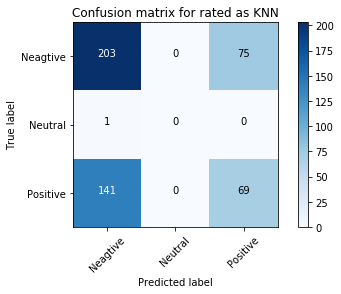

In [233]:
# KNN or k-Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)
cnf_matrix=confusion_matrix(y_val,y_pred)
plot_confusion_matrix(cnf_matrix,classes=["Neagtive","Neutral","Positive"],
                      title='Confusion matrix for rated as KNN')
precision = precision_score(y_val,y_pred,average='weighted')
recall=recall_score(y_val,y_pred,average='weighted')
fscore = f1_score(y_val,y_pred,average='weighted')
print("Precision : " + str(precision))
print("Recall : "+ str(recall))
print("F measure : " + str(fscore))
plt.figure()

In [234]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

57.06


In [235]:
def visualize_tree(tree, feature_names):
    """Create tree png using graphviz.

    Args
    ----
    tree -- scikit-learn DecsisionTree.
    feature_names -- list of feature names.
    """
    with open("dt.dot", 'w') as f:
        export_graphviz(tree, out_file=f,
                        feature_names=feature_names)

    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    try:
        subprocess.check_call(command)
    except:
        exit("Could not run dot, ie graphviz, to "
             "produce visualization")


In [236]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)


59.3


In [237]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',  'Naive Bayes'],
    'Score': [acc_svc, acc_knn, acc_logreg, acc_gaussian]})
models.sort_values(by='Score', ascending=False)

,Model,Score
3,Naive Bayes,57.87
0,Support Vector Machines,56.85
2,Logistic Regression,56.24
1,KNN,55.62
